In [ ]:
# ===============================
# Importing Libraries
# ===============================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    recall_score,
    f1_score,
)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier

# Warnings and OS
import warnings
import os

warnings.filterwarnings('ignore')

In [ ]:
Telco=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [ ]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Telco.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
# Drop customerID
Telco.drop("customerID",axis=1, inplace=True)

In [ ]:
# Columns in dataset
Telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(Telco.info())
print()
print(Telco.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
print("Total Missing Rows --->>>  " , Telco.isnull().sum().sum())
print("Total duplicated Rows --->>>  " , Telco.duplicated().sum())

Total Missing Rows --->>>   0
Total duplicated Rows --->>>   22


In [ ]:
for i in Telco.columns:
    print("Feature -->> ", i)
    print(f"Number of UNIQUE values in {i} columns -- >> [{Telco[i].nunique()}]")
    print(f"UNIQUE values in {i} columns -- >> [{Telco[i].unique()}]")
    print("--"*20)

Feature -->>  gender
Number of UNIQUE values in gender columns -- >> [2]
UNIQUE values in gender columns -- >> [['Female' 'Male']]
----------------------------------------
Feature -->>  SeniorCitizen
Number of UNIQUE values in SeniorCitizen columns -- >> [2]
UNIQUE values in SeniorCitizen columns -- >> [[0 1]]
----------------------------------------
Feature -->>  Partner
Number of UNIQUE values in Partner columns -- >> [2]
UNIQUE values in Partner columns -- >> [['Yes' 'No']]
----------------------------------------
Feature -->>  Dependents
Number of UNIQUE values in Dependents columns -- >> [2]
UNIQUE values in Dependents columns -- >> [['No' 'Yes']]
----------------------------------------
Feature -->>  tenure
Number of UNIQUE values in tenure columns -- >> [73]
UNIQUE values in tenure columns -- >> [[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14

In [ ]:
cat_features = Telco.select_dtypes(exclude='number')

for i in cat_features.columns:
    print("feature -->> " , i)
    print(cat_features[i].value_counts())
    print("=="*20)

feature -->>  gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
feature -->>  Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
feature -->>  Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
feature -->>  PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
feature -->>  MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
feature -->>  InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
feature -->>  OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
feature -->>  OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
feature -->>  DeviceProtection
DeviceProtection
No                     3095
Yes  

In [ ]:
Telco["TotalCharges"].value_counts().iloc[:10]

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
19.65,8
45.3,7
19.55,7
20.15,6


Missing Values -->>  11
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


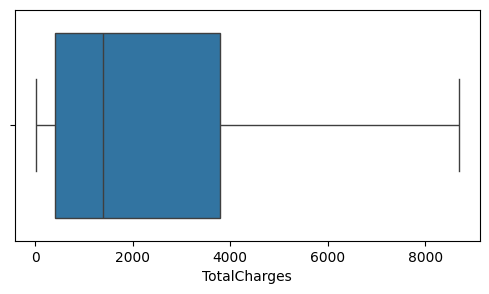

Missing Values after filling -->>  0


In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors into NaN
Telco["TotalCharges"] = pd.to_numeric(Telco["TotalCharges"], errors='coerce')

# Check and print the number of missing values
print("Missing Values -->> ", Telco["TotalCharges"].isnull().sum())

# Print summary statistics
print(Telco["TotalCharges"].describe())

# Boxplot to visualize the distribution and potential outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=Telco["TotalCharges"])
plt.show()

# Fill missing values with the median of the 'TotalCharges' column
Telco['TotalCharges'] = Telco['TotalCharges'].fillna(Telco['TotalCharges'].median())

# Optionally, print the number of missing values again to confirm it's filled
print("Missing Values after filling -->> ", Telco["TotalCharges"].isnull().sum())

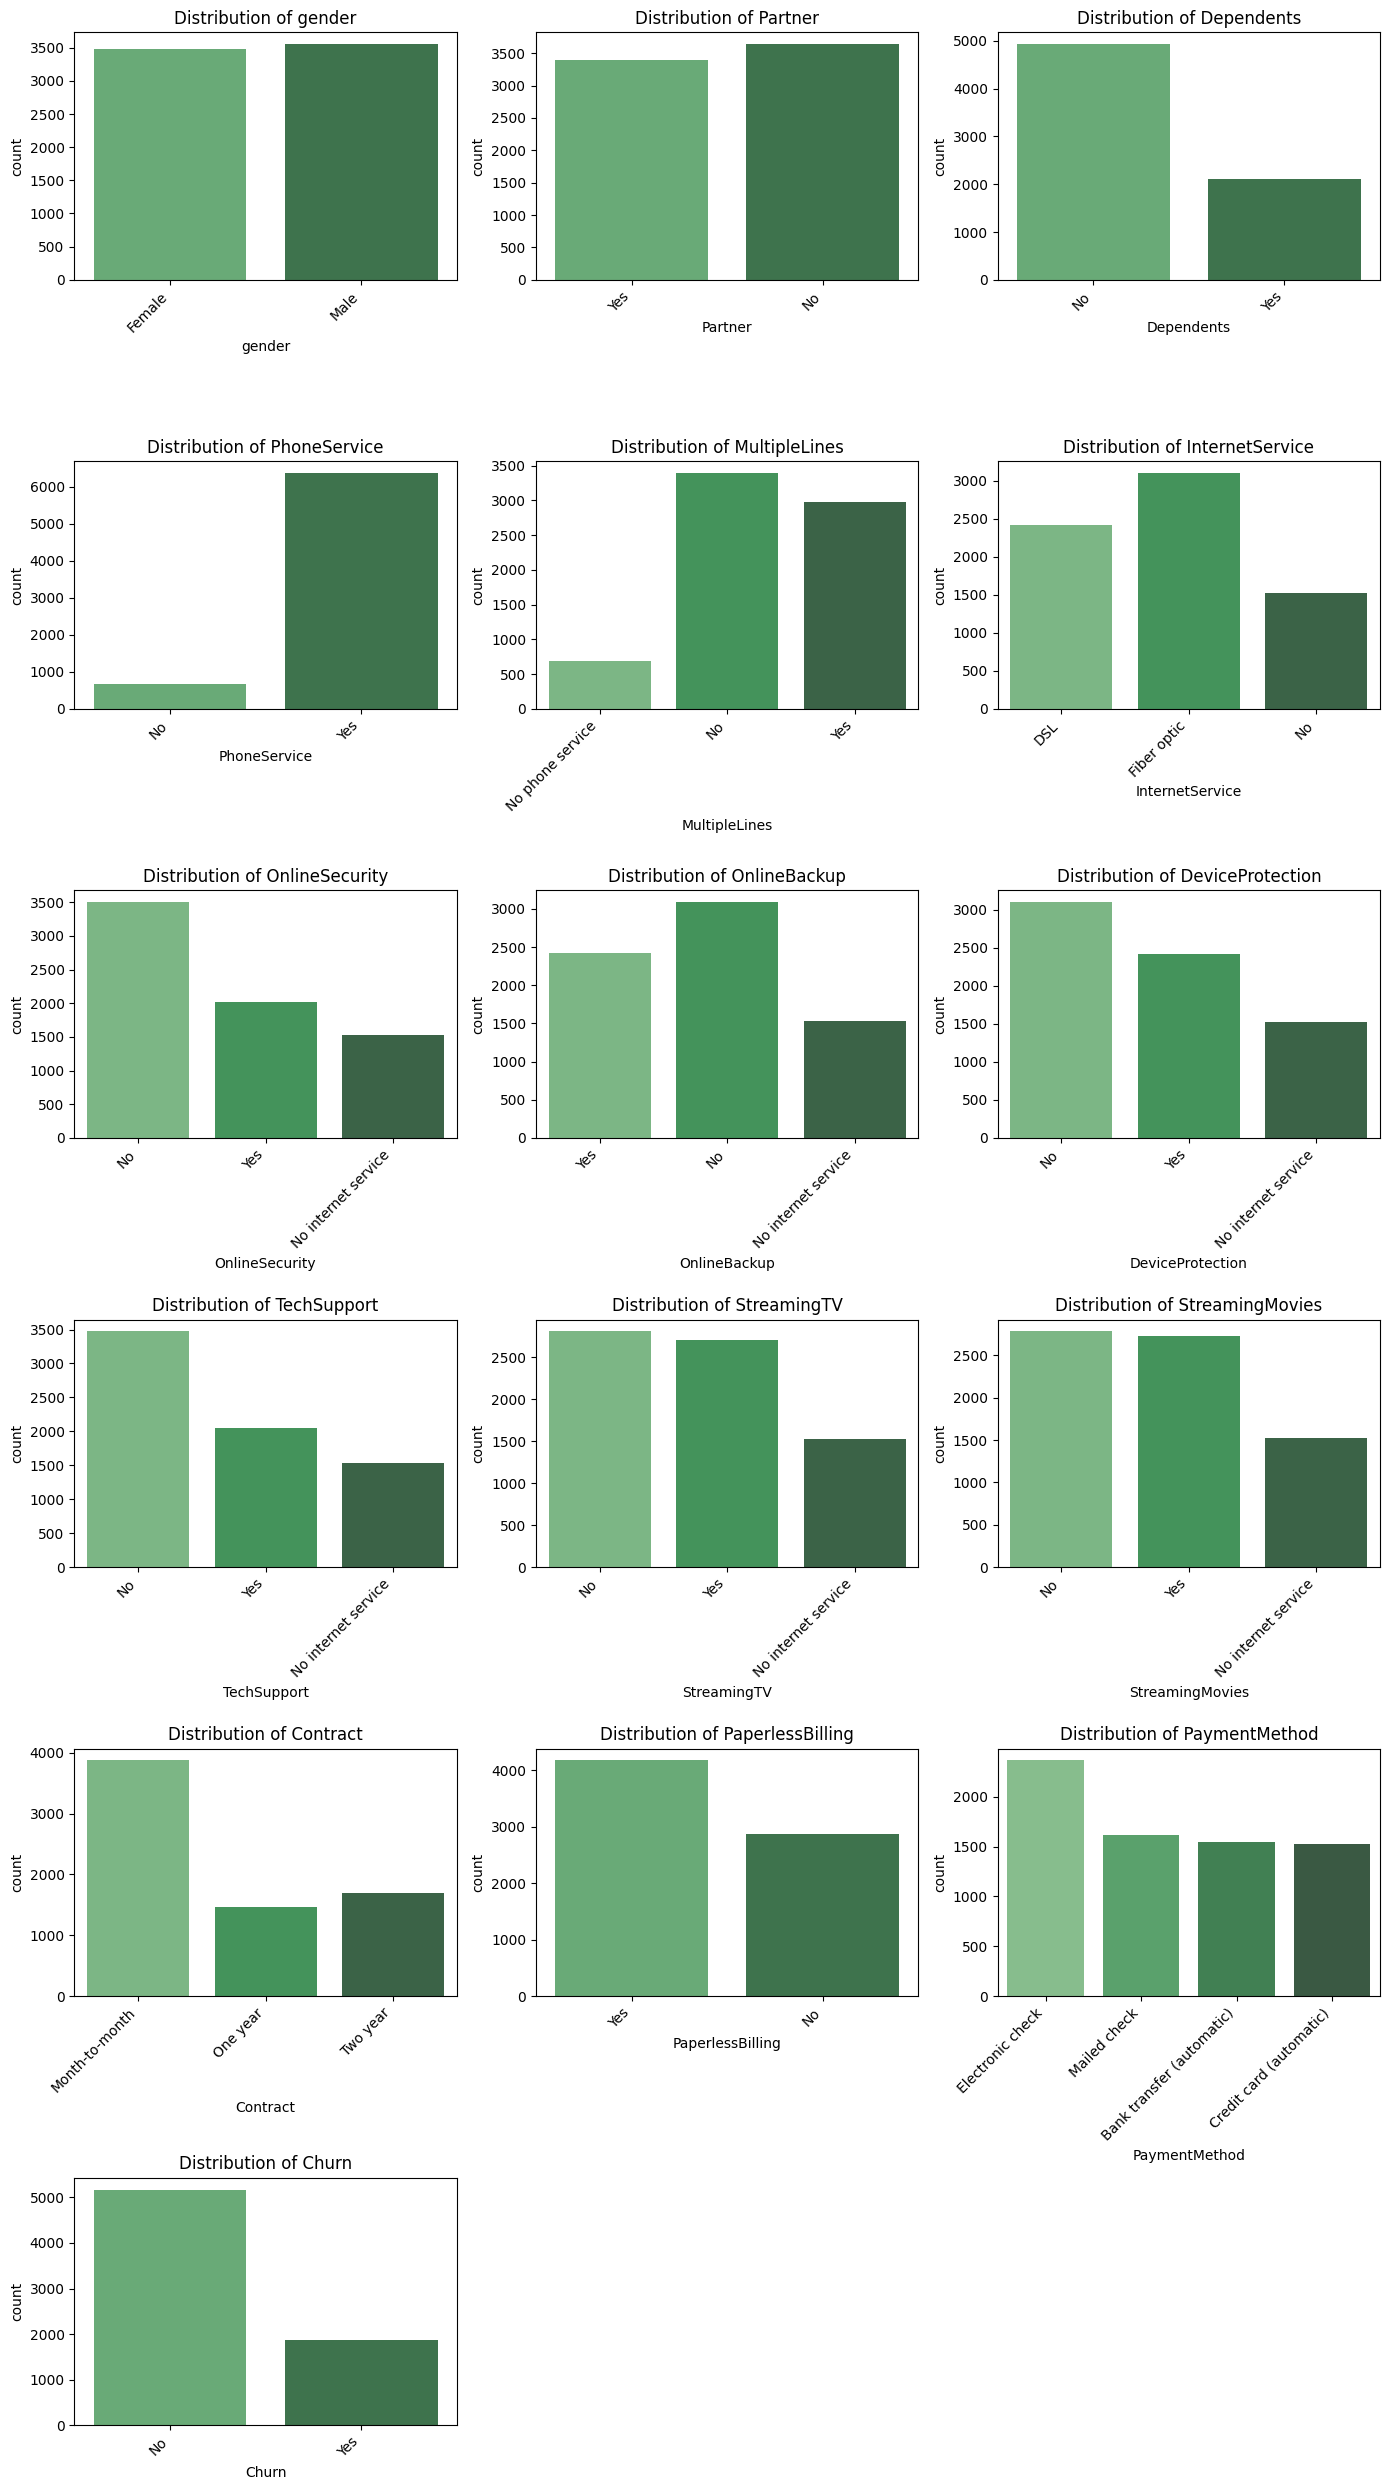

In [ ]:
cat_features = Telco.select_dtypes(exclude='number')

fig, ax = plt.subplots(6, 3, figsize=(14, 25))
ax = ax.flatten()

# Loop through categorical features and plot distribution
for i, feature in enumerate(cat_features.columns):
    sns.countplot(x=cat_features[feature], ax=ax[i], palette='Greens_d')
    ax[i].set_title(f"Distribution of {feature}")

    # Add x-ticks (optional: rotate for better readability if needed)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")

for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

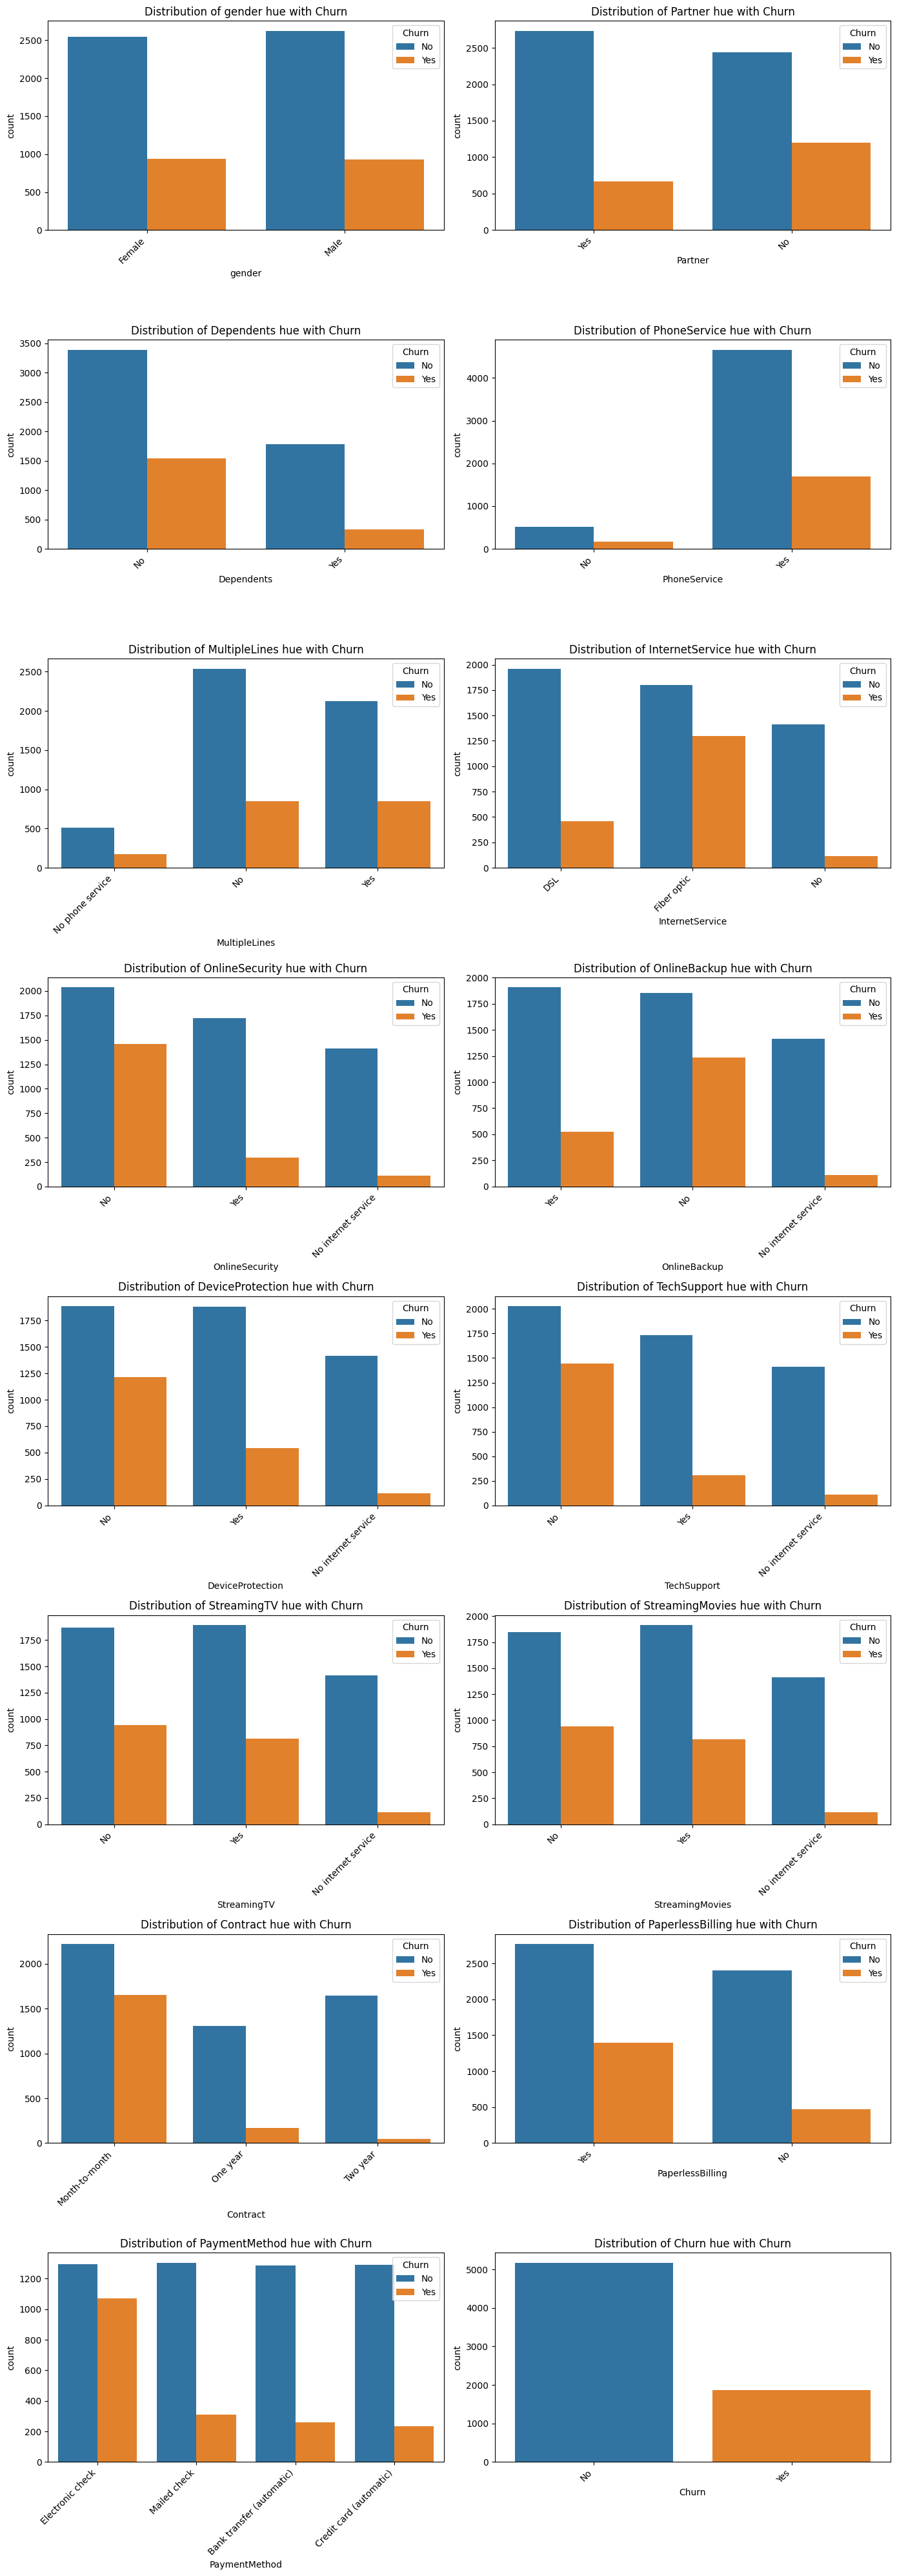

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(14, 40))
ax = ax.flatten()

# Loop through categorical features and plot distribution
for i, feature in enumerate(cat_features.columns):
    sns.countplot(x=cat_features[feature], hue=cat_features["Churn"], ax=ax[i])
    ax[i].set_title(f"Distribution of {feature} hue with Churn")

    # Add x-ticks (optional: rotate for better readability if needed)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")

for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
num_features = Telco.select_dtypes(include='number')
num_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

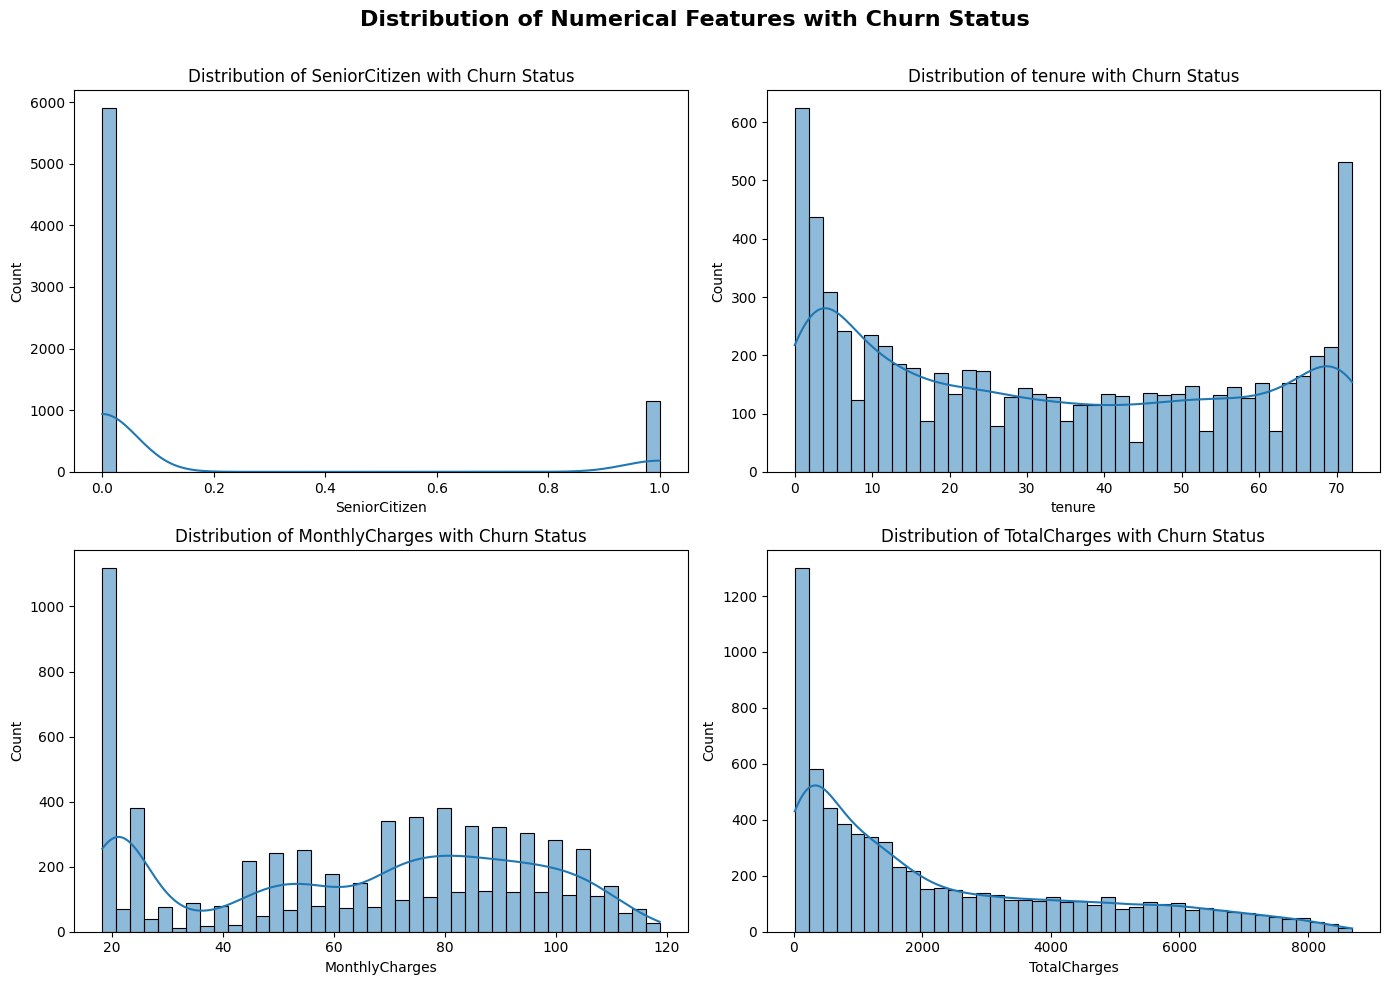

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

# Loop through numerical features and plot distribution with Churn as hue
for i, feature in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=feature, ax=ax[i], kde=True,bins=40)
    ax[i].set_title(f"Distribution of {feature} with Churn Status")


plt.suptitle("Distribution of Numerical Features with Churn Status", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

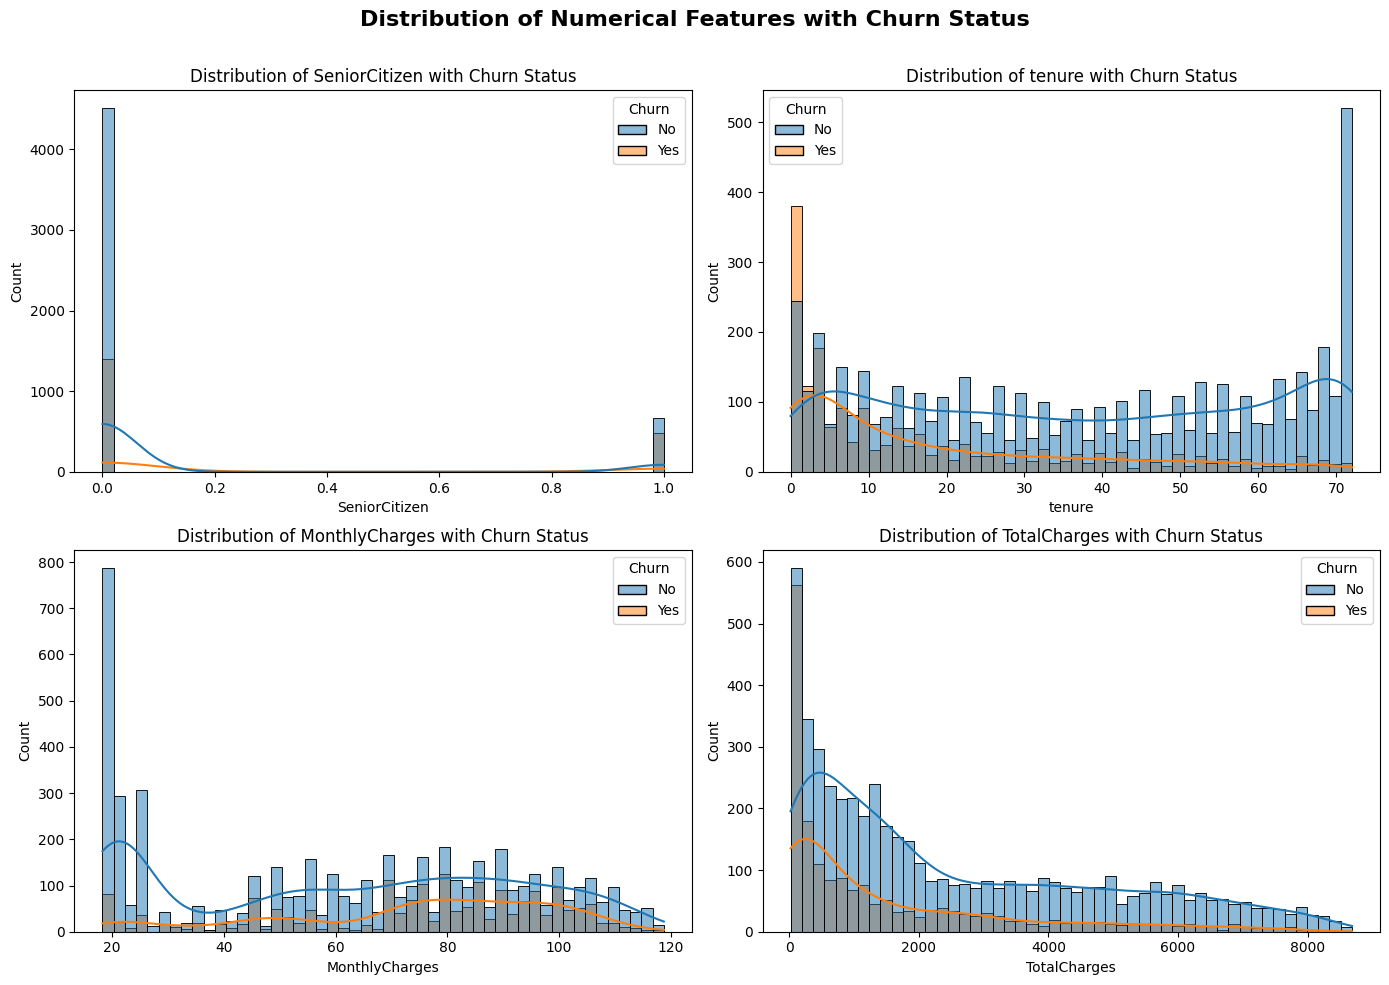

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

# Loop through numerical features and plot distribution with Churn as hue
for i, feature in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=feature, ax=ax[i],hue=Telco["Churn"], kde=True,bins=50)
    ax[i].set_title(f"Distribution of {feature} with Churn Status")

# Adjust layout for better spacing
plt.suptitle("Distribution of Numerical Features with Churn Status", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position to avoid overlap
plt.show()

In [ ]:
numfeature = Telco.select_dtypes("number")

corr_metrix = numfeature.corr()
corr_metrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


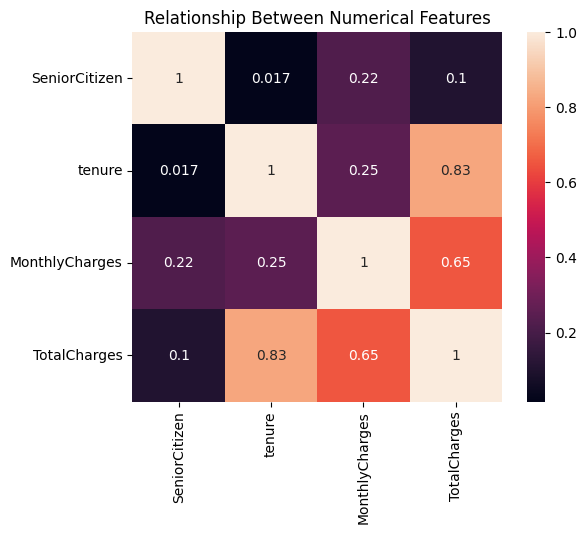

In [ ]:
sns.heatmap(corr_metrix,annot=True,square = True)
plt.title("Relationship Between Numerical Features")
plt.show()

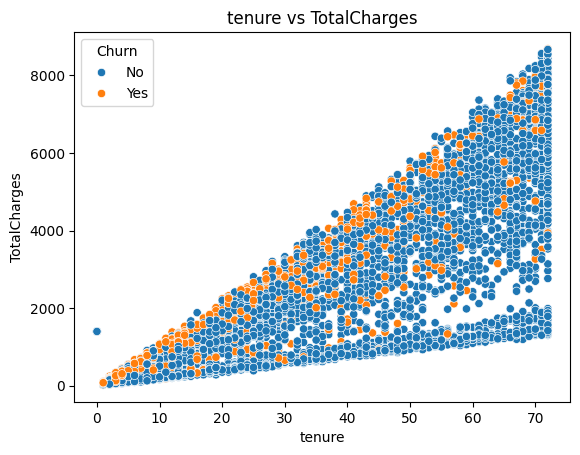

In [ ]:
sns.scatterplot(x=Telco["tenure"],y=Telco["TotalCharges"], hue=Telco["Churn"])
plt.title("tenure vs TotalCharges")
plt.show()

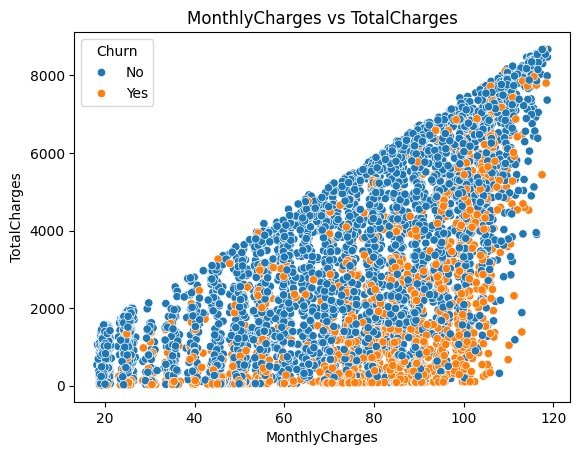

In [ ]:
sns.scatterplot(x=Telco["MonthlyCharges"],y=Telco["TotalCharges"], hue=Telco["Churn"])
plt.title("MonthlyCharges vs TotalCharges")
plt.show()

In [ ]:
X = Telco.drop("Churn", axis=1)
y = Telco["Churn"]

X.shape, y.shape

((7043, 19), (7043,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

print("Size of x_train -- >> " , x_train.shape)
print("Size of x_test -- >> " , x_test.shape)
print("Size of y_train -- >> " , y_train.shape)
print("Size of y_test -- >> " , y_test.shape)

Size of x_train -- >>  (5634, 19)
Size of x_test -- >>  (1409, 19)
Size of y_train -- >>  (5634,)
Size of y_test -- >>  (1409,)


In [ ]:
# {'NO':0 , 'yes':1}
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
train_obj = x_train.select_dtypes(include="object")
test_obj = x_test.select_dtypes(include="object")

In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype = np.int32)

train_ohe = ohe.fit_transform(train_obj)
test_ohe = ohe.transform(test_obj)

train_columns = ohe.get_feature_names_out(train_obj.columns)

ohe_train = pd.DataFrame(data=train_ohe, columns=train_columns)
ohe_test = pd.DataFrame(data=test_ohe, columns=train_columns)
ohe_train.shape , ohe_test.shape

((5634, 26), (1409, 26))

In [ ]:
train_numfeature = x_train.select_dtypes("number")
test_numfeature = x_test.select_dtypes("number")

In [ ]:
scaler = StandardScaler()
train_scale = scaler.fit_transform(train_numfeature)
test_scale = scaler.transform(test_numfeature)

scaler_train = pd.DataFrame(data=train_scale, columns=train_numfeature.columns)
scaler_test = pd.DataFrame(data=test_scale, columns=train_numfeature.columns)

scaler_train.shape , scaler_test.shape

((5634, 4), (1409, 4))

In [ ]:
x_train = pd.concat([ohe_train,scaler_train],axis=1)
x_test = pd.concat([ohe_test,scaler_test],axis=1)
# Size
x_train.shape , x_test.shape

((5634, 30), (1409, 30))

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection  = ExtraTreesRegressor()
selection .fit(x_train,y_train)

selection.feature_importances_

array([0.03983291, 0.03488075, 0.02912649, 0.00467366, 0.00357009,
       0.02433048, 0.09394878, 0.00116338, 0.00129188, 0.02656143,
       0.00164191, 0.03059301, 0.00175163, 0.02730439, 0.00158963,
       0.02491718, 0.00140083, 0.02280422, 0.0014165 , 0.0245354 ,
       0.02438225, 0.02696335, 0.03389225, 0.01981771, 0.02474983,
       0.01915992, 0.02989389, 0.17843301, 0.10361898, 0.14175425])

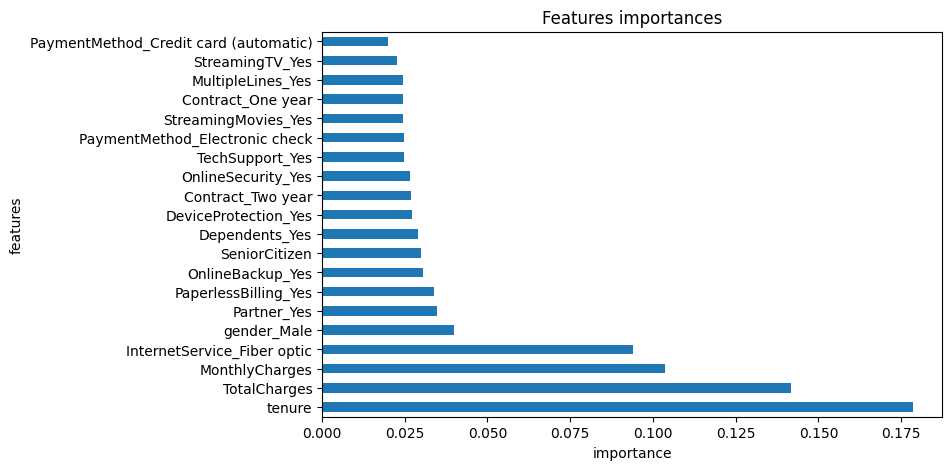

In [ ]:
plt.figure(figsize=(8,5))
feature_importance = pd.Series(selection.feature_importances_, index=x_train.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.title("Features importances")
plt.ylabel('features')
plt.xlabel('importance')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train =smote.fit_resample(x_train, y_train)
x_train.shape , y_train.shape

((8276, 30), (8276,))

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train =smote.fit_resample(x_train, y_train)
x_train.shape , y_train.shape

((8276, 30), (8276,))

In [ ]:
model_lr = LogisticRegression()
model_gnb = GaussianNB()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_ab = AdaBoostClassifier()
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier()

In [ ]:
def model_train_evaluation(model):

    print("Model -->> " , model)

    model.fit(x_train,y_train)
    print()
    print("Model Train Succesfully")
    print()

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print("Model Performance on Train Data ")

    train_score = accuracy_score(train_pred,y_train)
    train_crep = classification_report(train_pred,y_train)

    print("Accuracy Score on Train Data -- >> ",train_score)
    print("Classification Report on Train Data")
    print(train_crep)

    print("--"*20)

    print("Model Performance on Test Data ")

    test_score = accuracy_score(test_pred,y_test)
    test_crep = classification_report(test_pred,y_test)

    print("Accuracy Score on Test Data -- >> ",test_score)
    print("Classification Report on Test Data")
    print(test_crep)

    print("=="*20)


    cm = confusion_matrix(y_test,test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

Model -->>  LogisticRegression()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7995408409859835
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      3841
           1       0.84      0.78      0.81      4435

    accuracy                           0.80      8276
   macro avg       0.80      0.80      0.80      8276
weighted avg       0.80      0.80      0.80      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7721788502484032
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       881
           1       0.78      0.55      0.64       528

    accuracy                           0.77      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.77      0.77      0.76      1409



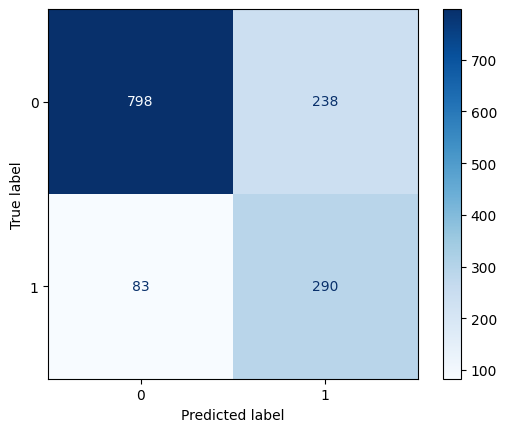

Model -->>  GaussianNB()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7455292411793136
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      3082
           1       0.87      0.70      0.77      5194

    accuracy                           0.75      8276
   macro avg       0.75      0.76      0.74      8276
weighted avg       0.78      0.75      0.75      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.6891412349183819
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       700
           1       0.86      0.45      0.60       709

    accuracy                           0.69      1409
   macro avg       0.74      0.69      0.67      1409
weighted avg       0.75      0.69      0.67      1409



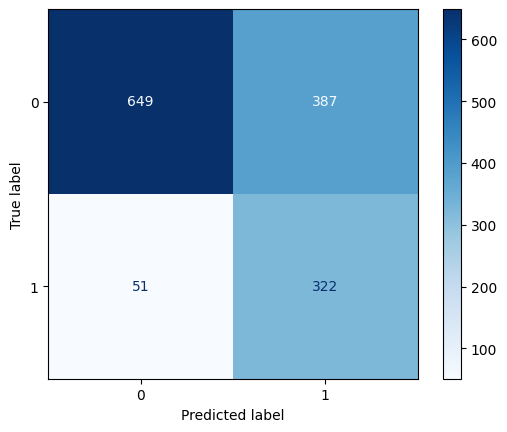

Model -->>  SVC()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.8212904784920251
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      3897
           1       0.85      0.80      0.83      4379

    accuracy                           0.82      8276
   macro avg       0.82      0.82      0.82      8276
weighted avg       0.82      0.82      0.82      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7721788502484032
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       905
           1       0.75      0.55      0.63       504

    accuracy                           0.77      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.77      0.77      0.76      1409



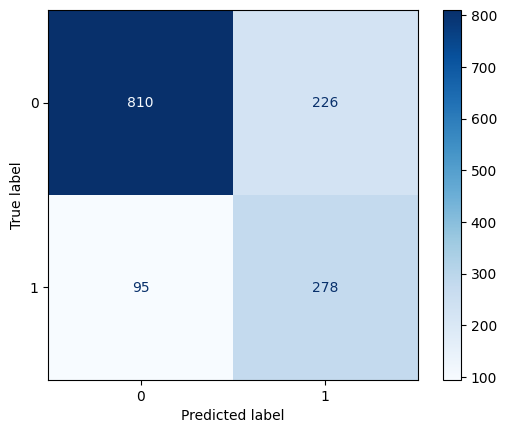

Model -->>  DecisionTreeClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.9990333494441759
Classification Report on Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4140
           1       1.00      1.00      1.00      4136

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7154009936124911
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       959
           1       0.57      0.47      0.51       450

    accuracy                           0.72      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.70      0.72      0.71      140

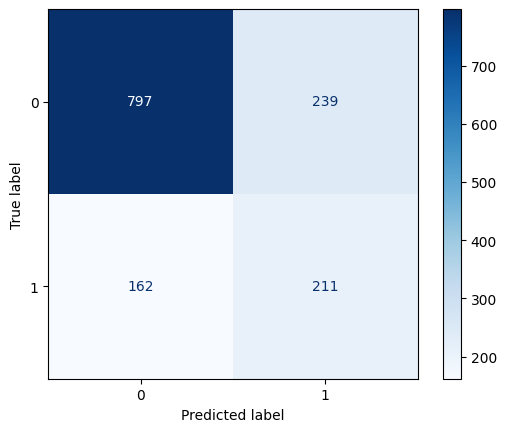

Model -->>  RandomForestClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.9990333494441759
Classification Report on Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4134
           1       1.00      1.00      1.00      4142

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7757274662881476
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       990
           1       0.64      0.57      0.60       419

    accuracy                           0.78      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.77      0.78      0.77      140

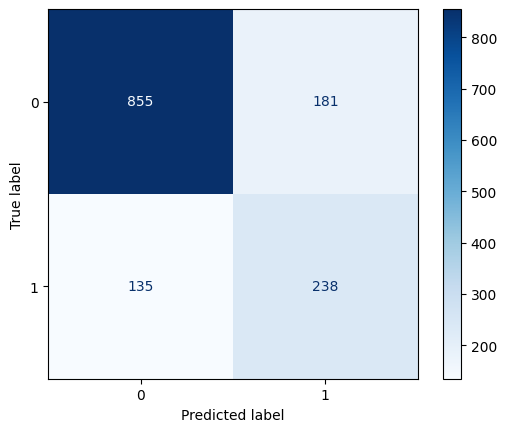

Model -->>  AdaBoostClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7820202996616723
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      3702
           1       0.83      0.76      0.79      4574

    accuracy                           0.78      8276
   macro avg       0.78      0.79      0.78      8276
weighted avg       0.79      0.78      0.78      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.758694109297374
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       816
           1       0.84      0.53      0.65       593

    accuracy                           0.76      1409
   macro avg       0.78      0.73      0.73      1409
weighted avg       0.78      0.76      0.75      1409



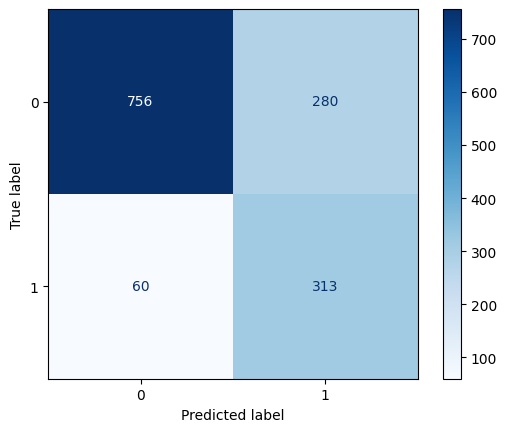

Model -->>  GradientBoostingClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.8166988883518608
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3745
           1       0.86      0.79      0.83      4531

    accuracy                           0.82      8276
   macro avg       0.82      0.82      0.82      8276
weighted avg       0.82      0.82      0.82      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7686302342086586
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       870
           1       0.79      0.54      0.64       539

    accuracy                           0.77      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.77      0.77      0.76     

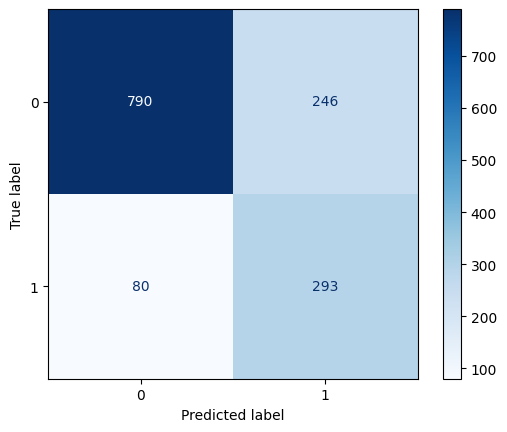

Model -->>  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.9397051715804736
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.91  

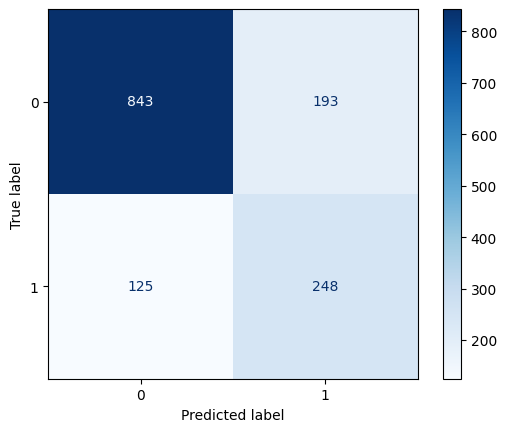

In [ ]:
model_train_evaluation(model_lr)
model_train_evaluation(model_gnb)
model_train_evaluation(model_svm)
model_train_evaluation(model_dt)
model_train_evaluation(model_rf)
model_train_evaluation(model_ab)
model_train_evaluation(model_gb)
model_train_evaluation(model_xgb)

In [ ]:
lr = LogisticRegression(
    solver= 'lbfgs', random_state= 42, penalty= 'l2',
    max_iter= 100, class_weight= 'balanced', C= 1.0
)
lr.fit(x_train,y_train)

train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

train_score = classification_report(train_pred,y_train)
test_score = classification_report(test_pred,y_test)
print(train_score)
print('=='*20)
print(test_score)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      3841
           1       0.84      0.78      0.81      4435

    accuracy                           0.80      8276
   macro avg       0.80      0.80      0.80      8276
weighted avg       0.80      0.80      0.80      8276

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       881
           1       0.78      0.55      0.64       528

    accuracy                           0.77      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.77      0.77      0.76      1409



In [ ]:
params_xgb = {
    'objective': ['binary:logistic'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 3],
    'scale_pos_weight': [1, 10, 25],
    'random_state': [42],

}

In [ ]:
xgb = XGBClassifier()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params_xgb,
    n_iter=100,
    scoring='recall',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

AttributeError: 'super' object has no attribute '__sklearn_tags__'